## CV-Module 21 (Model Design)

**100019**

In [11]:
!pip install einops
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import tqdm, time, copy
import heapq
import datetime
import glob
import random,time

import math, random

from functools import partial

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *  # * means all the things included in tf & keras all be imported at a time
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import einops
from einops import*
import pathlib
import itertools
from keras.layers import Lambda
import warnings as wr
wr.filterwarnings('ignore')



import random
from tensorflow import (abs,cast,clip_by_value,concat,convert_to_tensor,
    expand_dims, gather,gather_nd,linspace, map_fn,matmul,norm,pad,
    print,range,repeat,reshape,shape,sign,split,squeeze,stack,tensor_scatter_nd_update,tile,transpose,unstack,zeros,
)


In [12]:
#Number of parameters = (N x M x D + 1) x K  # this si the formula of counting params of cnn model


# Basic layers

In [13]:
#Number of parameters = (N x M x D + 1) x K
kr = 2  # Kernel Size

image_size = 32        # input image dimensions are 32x32 pixels with 3 channels (RGB)

x_input = layers.Input(shape=(image_size,image_size,3))  # (32, 32, 3) (32x32 RGB images), and assigns it to d1. 3 channels (RGB)
d1 = x_input


# x_input as the input and d1 as the output. In this case, the model simply takes the input and outputs it without any modifications (an identity model).
class_model = Model(inputs = x_input, outputs=d1)   # the model import from tf.keras
class_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Explain

**Parameters**

- 𝑁 is the number of input features.
- 𝑀 is the number of hidden units.
- 𝐷 is the depth (number of layers).
- 𝐾 is the number of output features.


**Assumption**
- This is basic layer desion, no params defined, out trainable & non-trainable parames will be 0
- What the input define, output wil be same as input

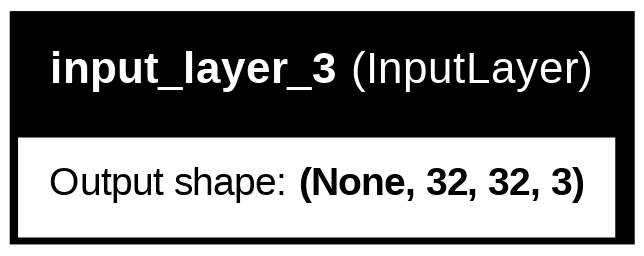

In [14]:
# Visualization
from tensorflow.keras.utils import plot_model
plot_model(class_model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Pytorch

#### Test 2: PyTorch

In [15]:
# Necessary Library
!pip install torchinfo     # For Pytorch - summarizing and visualizing PyTorch models
!pip install torchsummary  # For Pytorch - summarizing and visualizing PyTorch models

import torch.nn as nn
from torchinfo import summary

# Define Model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        # Additional layers can be added here if needed

    def forward(self, x):
        # Since we're just passing the input to output, we can return x directly, here x is dynamic can take any
        return x

# Initialize the Model
model = SimpleModel()

# Print the model Summary using TorchSummary
summary(model,(3, 32, 32))  # (Channel, hights, width)

Layer (type:depth-idx)                   Output Shape              Param #
SimpleModel                              [3, 32, 32]               --
Total params: 0
Trainable params: 0
Non-trainable params: 0
Total mult-adds (M): 0
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

#### Notes- Pytorch

**Notes**
- Class File (OPP) is every essential for PyTorch
- `__init__:` This is the constructor method where you can define layers or components of the model. Currently, it's empty, but you can add layers if needed.
- `forward:` This method defines the forward pass of the model. Here, we're simply returning the input x as the output without any modifications. This is a placeholder, and you can add more complex operations if required.

**Shape**
- When we practice we try to use `Even` shape instead `Odd` number like 256x256, 512x512, 1024x2024, 512x768, 340x512 ect.
- We use this Even Numbers, so that we can `downsampling` this and get anomther Even Numbers (Q. Why use Even Number), its  for Processing efficiency!

**TensforFlow vs PyTorch**
- TensorFlow is easy practice over PyTorch Applicatioin

#### Test 2.1 : Excercise

- Use 2x2 Kernel
- Use Conv2D
- Use Padding

In [16]:
#Number of parameters = (N x M x D + 1) x K

# N = M = kernel size
# D = input channel count
# K = output filter / channel count



image_size = 32        # setting img_size 32x32 pixel
inputs = layers.Input(shape=(image_size, image_size,3)) # image_size 32x32 pixel with 3 channel(RGB)
d1 = (inputs)  # input passed in d1 var

d1 = Conv2D(10, kernel_size=(2,2), padding='same')(d1)      # Simple Conv ops with 10 filters applied on d1 and saved in d1

class_model = Model(inputs = inputs, outputs= d1)  # finally d1 send to output layer
class_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 10)          │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130 (520.00 B)

 Trainable params: 130 (520.00 B)

 Non-trainable params: 0 (0.00 B)

### Explain

**Notes**
- input : 32, 32, 3 which passed to next layer with 10 filters so 32,32,10
- `Conv`: This line applies a 2D convolutional layer to d1. The Conv2D layer has 10 filters with a kernel size of (2, 2). The padding='same' ensures that the output has the same spatial dimensions as the input.


**How to get 130 Parameters ?**

- Kernel Size: (2, 2)
- Input Channels: 3 (since the input image has 3 channels: RGB)
- Number of Filters: 10
- Bias: 1 (a bias term for each filter)

**Calculation**:

1. Kernel Parameters per Filter:
   Kernel Parameters =`Kernel Height × Kernel Width × Input Channels = 2 x 2 x 3 = 12`
   
2. Add Bias:
   Total Parameters per Filter = `Kernel Parameters + Bias  = 12 + 1 = 13`

3. Total Parameters for All Filters
   Total Parameters = `Total Parameters per Filter × Number of Filters  13 x 10 = 130`


Therefore, the total number of parameters for the `Conv2D` layer is `130`.
Breaking it down, `each filter has 12 weights` for the kernel and `1 bias term`, and since you have 10 filters, you multiply the total parameters per filter by the number of filters to get 130 parameters.


**Calculation Example 2**

Number of Parameters = (𝑁×𝑀×𝐷+1)×𝐾

- N: Kernel Height
- M: Kernel Width
- D: Number of Input Channels (Depth of the input)
- K: Number of Filters (Output channels)
- 1: Bias term for each filter
  
**Given your parameters:**

- N = 2 (Kernel Height)
- M = 2 (Kernel Width)
- D = 3 (Number of Input Channels, as the input image has 3 channels: RGB)
- K = 10 (Number of Filters)


1. Calculate Kernel Parameters Per Filter:

     𝑁×𝑀×𝐷=2×2×3=12

2. Add the Bias Term:

    Kernel Parameters +1=12+1=13


3. Calculate Total Parameters:

    Number of Parameters =13×𝐾=13×10=130

So, by using the formula:Number of Parameters=(2×2×3+1)×10=(12+1)×10=13×10=130


---
**Parameter Calcution Formula**

- N: Kernel Height
- M: Kernel Width
- D: Number of Input Channels (Depth of the input)
- K: Number of Filters (Output channels)
- 1: Bias term for each filter
- `N x M`: This represents the size of the kernel. e.g 3 x 3
- `𝐷` : This represents the number of input channels. In this case, D=3, `RGB`
- `+`1: This accounts for the bias term.


### Excercise - 3

In [17]:
# Define your model
class ConvModel(nn.Module):
    def __init__(self):
        super(ConvModel, self).__init__()
        # Define a convolutional layer with 10 filters, 2x2 kernel size, and 'same' padding
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(2, 2), padding='same')

    def forward(self, x):
        # Apply the convolutional layer
        x = self.conv1(x)
        return x

# Initialize the model 
model = ConvModel()

# Print model summary using torchsummary
summary(model, input_size=(3, 32, 32))  # (channels, height, width)

Layer (type:depth-idx)                   Output Shape              Param #
ConvModel                                [10, 32, 32]              --
├─Conv2d: 1-1                            [10, 32, 32]              130
Total params: 130
Trainable params: 130
Non-trainable params: 0
Total mult-adds (M): 0.04
Input size (MB): 0.01
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.09

## Text 3: PyTorch Application

In [18]:
# Test 1
# Define your model
class ConvModel(nn.Module):
    def __init__(self):
        super(ConvModel, self).__init__()
        # Define a convolutional layer with 10 filters, 2x2 kernel size, and 'same' padding           # 10 Filters/ 10 Different Features
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(2, 2), padding='same')

    def forward(self, x):
        # Apply the convolutional layer
        x = self.conv1(x)
        return x

# Initialize the model
model = ConvModel()

# Print model summary using torchsummary
summary(model, input_size=(3, 32, 32))  # (channels, height, width)

Layer (type:depth-idx)                   Output Shape              Param #
ConvModel                                [10, 32, 32]              --
├─Conv2d: 1-1                            [10, 32, 32]              130
Total params: 130
Trainable params: 130
Non-trainable params: 0
Total mult-adds (M): 0.04
Input size (MB): 0.01
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.09

#### Weights

In [19]:
# Instructor will discuss later on this(weights)
wt = class_model.get_weights()  # retrieving the weights of all the layers in the model.get_weights() will return a list of NumPy arrays
len(wt)

2

In [20]:
# Model A (using TensorFlow/Keras)

inputs = layers.Input(shape=(image_size,image_size,3))     # Define input of the model with 3 channel
d1 =  (inputs)

d1 = Conv2D(5 ,kernel_size=(3,3), padding='same', activation='gelu')(d1)  # Added a 2D Conv layers with 5  filters each of size is (3,3)
d1 = Activation('gelu')(d1)         # Defining this optiona here when pass above after padding

class_model = Model(inputs = inputs, outputs = d1)
class_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 5)           │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 5)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

#### Notes

- `The padding='same'` ensures that the output size is the same as the input size. The activation function used here is gelu (Gaussian Error Linear Unit)
- `class_model = Model(inputs = inputs, outputs = d1)` : This creates the model by specifying the input and output layers. This prints a summary of the model, showing the layers and the number of parameters.
- No Parameter in Activations Layer

**Entire Network Consist of:**
- An input layer for the images.
- A convolutional layer to extract features from the images using a `gelu` activation function.
- The model is built and summarized.

**Parameters Calcuation**

`Number of parameters=(Kernel width×Kernel height×Number of input channels+Bias term)×Number of filter`

- Kernel size = 3x3
- Channels = 3
- Number of Filter = 5

**Working**

- So, Kernel Width: 3 and Height 3
- Number of input Channels : 3
- Bias Term 1 (Each Filter has one bias Term)
- Number of Filter : 5

So, As per Formula, total parameter will be:

`(3 x 3 x 3 + 1)
= 27 + 1
= 28`
  
So, the filter has `28 parameters`.
Since there are 5 filters so, the total number of parameters is:

`28 (Parameters Per Filter) x 5 (Number of Filter)`
`= 140`

Therefore, the Conv2D layer has 140 parameters in total.



In [21]:
# Model B (using PyTorch)
class ConvGELUModel(nn.Module): 
    def __init__(self):
        super(ConvGELUModel, self).__init__()
        # Define a convolutional layer with 5 filters, 3x3 kernel size, and 'same' padding
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels=5, kernel_size=(3, 3), padding='same')
        # Define the GELU activation function
        self.gelu = nn.GELU()

    def forward(self,x):
        # Apply the convolutional layer followed by GELU activation
        x = self.conv1(x)
        x = self.gelu(x)
        return x

# Initialize the model
model = ConvGELUModel()

# Print model summary using torchsummary
summary(model, input_shape=(3, 32, 32))  # (channels, height, width)


Layer (type:depth-idx)                   Param #
ConvGELUModel                            --
├─Conv2d: 1-1                            140
├─GELU: 1-2                              --
Total params: 140
Trainable params: 140
Non-trainable params: 0

### Explanation

**Initialization (__init__ method):**

`super(ConvGELUModel, self).__init__():` Calls the initializer of the parent class `nn.Module`. This is necessary to properly initialize the model.

`self.conv1 = nn.Conv2d(...):` Defines a 2D convolutional layer. It takes in 3 input channels (e.g., RGB color channels), and outputs 5 feature maps (filters). The kernel size is (3, 3), meaning the convolutional filter has dimensions of 3x3. The padding is set to 'same', which means the output size will be the same as the input size.

**Forward Pass (forward method):**

`x = self.conv1(x):` Applies the convolutional layer to the input tensor x.

`x = self.gelu(x):` Applies the GELU (Gaussian Error Linear Unit) activation function to the output of the convolutional layer.

The GELU activation function is a smoother alternative to ReLU (Rectified Linear Unit) and can be beneficial for certain types of data and tasks.

**Model Summary:**

`model = ConvGELUModel():` Initializes an instance of the ConvGELUModel.

`summary(model, input_shape=(3, 32, 32)):` Prints a summary of the model's architecture, using the torchsummary package. The input shape is specified as (3, 32, 32), which means the model expects an input with 3 channels and spatial dimensions 32x32 (like a 32x32 RGB image).

#### Models Comperasion (Model A Vs Model B) Tensorflow & PyTorch

**Model A: TensorFlow**

**Framework**
TensorFlow/Keras: This model uses the Keras API, which is a high-level neural networks API running on top of TensorFlow.

**Layer Definitions:**

- `inputs = layers.Input(shape=(image_size, image_size, 3)):` Defines the input layer with a shape of (image_size, image_size, 3) (3 channels for RGB images).

- `d1 = Conv2D(5, kernel_size=(3, 3), padding='same', activation='gelu')(d1):` Adds a 2D convolutional layer with 5 filters, a kernel size of (3, 3), 'same' padding, and the GELU activation function directly.

- `d1 = Activation('gelu')(d1):` Applies the GELU activation function. This is optional here as the activation has already been applied in the previous layer.

**Model Definition:**

class_model = Model(inputs=inputs, outputs=d1): Defines the model by specifying the input and output layers.


**Model B (using PyTorch):**

**Framework:**

- PyTorch: This model uses PyTorch, a flexible and efficient deep learning library.

**Layer Definitions:**

- self.conv1 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(3, 3), padding='same'): Defines a 2D convolutional layer with 3 input channels, 5 filters, a kernel size of (3, 3), and 'same' padding.

- self.gelu = nn.GELU(): Defines the GELU activation function.

**Forward Pass:**

- x = self.conv1(x): Applies the convolutional layer to the input tensor x.
- x = self.gelu(x): Applies the GELU activation function to the output of the convolutional layer.

**Model Summary:**

`model = ConvGELUModel()`: Initializes the model.

`summary(model, input_shape=(3, 32, 32))`: Prints the model summary using the torchsummary package.


**Key Differences:**

**Framework:**

- Model A uses TensorFlow/Keras, which is often praised for its high-level API and ease of use.

- Model B uses PyTorch, which is known for its dynamic computation graph and flexibility.

**Model Definition:**

- Model A uses the Model class to define the model by specifying the inputs and outputs.

- Model B defines the model by creating a class that inherits from nn.Module and implements the forward method.

**Syntax and API:**

TensorFlow/Keras and PyTorch have different syntax and API conventions. Model A's code is more declarative, while Model B's code is more imperative.

## Batch Normalization

In [22]:
wt = class_model.get_weights()
len(wt)

2

In [23]:
# simple Keras model with an input layer, a convolutional layer, and batch normalization
image_shape = 32
inputs = layers.Input(shape=(image_size, image_size,3))
d1 = (inputs)

d1 = Conv2D(1, kernel_size=(3,3), padding='same', activation='gelu')(d1)
d1 = BatchNormalization()(d1)  

class_model = Model(inputs=inputs, outputs=d1)
class_model.summary()


'''
Task # 2: 
When Apply Batch Normalization, then Total Param 32, Trainable Param 32, Non-Trainable -2. 
Find who are these 2 Non-Trainable Params ?

'''

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 1)           │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 2 (8.00 B)

'\nTask # 2: \nWhen Apply Batch Normalization, then Total Param 32, Trainable Param 32, Non-Trainable -2. \nFind who are these 2 Non-Trainable Params ?\n\n'

#### Explanation

- `d1 = BatchNormalization()(d1):`This layer normalizes the output of the convolutional layer to improve the training process by stabilizing the learning process and speeding up convergence.
- `class_model = Model(inputs=inputs, outputs=d1)`: Creates the Keras model by specifying the input and output layers.
- Here for this model, the total Params are 32 (Conv + Batch) 28 + 4 =32
- Since BatchNormaization Param are 4, so its has 2 trainable & 2 Non-trainable params inside this normalization layers

In [24]:
# Same model, its for testing (Better Readibilty)
# Batch Normalization with Tensorflow 
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization

image_size = 32
inputs = layers.Input(shape=(image_size, image_size, 3))
d1 = (inputs)

d1 = Conv2D(1, kernel_size=(3, 3), padding='same', activation='gelu')(d1)
d1 = BatchNormalization()(d1)

class_model = Model(inputs=inputs, outputs=d1)
class_model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 1)           │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 2 (8.00 B)

### Layers Explanation

**Input Layer:**

- Type: `InputLayer`

- Output Shape: `(None, 32, 32, 3)`

- `Param #: 0` (No parameters because it's just the input definition)

**Conv2D Layer:**

- Type: `Conv2D`

- Output Shape: `(None, 32, 32, 1)`

- `Param #: 28` (Trainable parameters)

**Parameter Calculation:**

- Filters: 1

- Kernel Size: (3, 3)

- Input Channels: 3

- Bias Term: 1

- Total Params = (3 * 3 * 3 + 1) * 1 = 28

**Batch Normalization Layer:**

- Type: `BatchNormalization`

- Output Shape: `(None, 32, 32, 1)`

- `Param #: 4` (Total parameters, including both trainable and non-trainable)

**Parameter Calculation:**

**Trainable Parameters:**

- Gamma (scaling factor): 1

- Beta (shifting factor): 1

- Total Trainable Params = 1 + 1 = 2

**Non-Trainable Parameters:**

- Mean: 1

- Moving Variance: 1

- Total Non-Trainable Params = 1 + 1 = 2

**Identifying Non-Trainable Parameters:**

In the Batch Normalization layer, there are 2 non-trainable parameters: the moving mean and moving variance. These parameters are calculated during the training process and used during inference to normalize the data.

**Summary:**

- Input Layer: No parameters

- Conv2D Layer: 28 trainable parameters

- Batch Normalization Layer: 4 parameters (2 trainable, 2 non-trainable)

So, the non-trainable parameters in this model are the moving mean and moving variance of the Batch Normalization layer.

**Moving Mean and Moving Variance:**

**Batch Normalization:**

Batch Normalization is a technique used to improve the training of deep neural networks. It normalizes the inputs of a layer for each mini-batch, thereby reducing internal covariate shift.

**How It Works:**

During training, for each mini-batch, Batch Normalization calculates the mean and variance of the inputs.

It then normalizes the inputs by subtracting the batch mean and dividing by the batch standard deviation.

**Moving Mean and Moving Variance:**

Moving Mean: It's an exponential moving average of the batch means calculated during training.

Moving Variance: It's an exponential moving average of the batch variances calculated during training.

These moving statistics are updated during each training step to capture the running statistics of the entire training data.

**Why They Are Non-Trainable:**

Non-Trainable Parameters: These parameters are not updated through backpropagation and gradient descent. Instead, they are updated using a moving average formula.

Purpose: The moving mean and variance are used during inference (testing or deployment) to normalize the inputs based on the statistics learned during training. This ensures that the model's behavior is consistent between training and inference.

Consistency: By using moving averages, the normalization can be applied even when a single data point (or a batch of size one) is fed into the network during inference, providing consistent performance.

In summary, the moving mean and moving variance are essential for maintaining the learned normalization during inference, ensuring the model's performance remains stable and accurate. These parameters are updated during training but are not trainable in the conventional sense—they're not adjusted through gradients but through running averages.

**Task**


In [25]:
# Test : PyTorch
# Batch Normalization with PyTorch

from torchsummary import summary # Torch Summary used to print details Summary
class ConvGELUModel(nn.Module): 
    def __init__(self):
        super(ConvGELUModel, self). __init__()
        # Define a convolutional layer with 1 filter, 3x3 kernel size, and 'same' padding
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size=(3,3), padding=1 )  # padding=1 for 'same'
        # Define the GELU activation function
        self.gelu = nn.GELU()

        # Define Batch Normalization 
        self.batch_norm = nn.BatchNorm2d(1)  # Here inside 1 mean Channels (Applying on One channel and on EKJON both are correct, Out_channels 1 (ekjon)


    def forward(self, x):
        # Apply the convolutional layer, GELU activation, and Batch Normalization
        x = self.conv1(x)
        x = self.gelu(x)
        x = self.batch_norm(x)
        return x

# Initialize the model
model = ConvGELUModel()  

# Print model summary using torchsummary
summary(model, input_size=(3, 32, 32))  # (channels, height, width)  Shows 1,32,32 instead of 32,32,3 due to out_channels=1 defined

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 1, 32, 32]              28
              GELU-2            [-1, 1, 32, 32]               0
       BatchNorm2d-3            [-1, 1, 32, 32]               2
Total params: 30
Trainable params: 30
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


## Explanation


`[-1, 1, 32, 32]`
- `-1`: The -1 is used as a placeholder indicating that this dimension will be dynamically determined based on the number of samples in your input data batch during runtime. Batch size (number of samples in the batch).
- `1`: Number of channels (e.g., grayscale images have 1 channel, RGB images have 3 channels).
- `32, 32`: Height and width of the feature map (spatial dimensions).
- `Using -1` allows the network to process variable-sized batches of input data efficiently.

**Code Part- Class**

`class ConvGELUModel(nn.Module):

    def __init__(self):
    
        super(ConvGELUModel, self). __init__()`

**Explanation:**

from torchsummary import summary: This line imports the summary function from the torchsummary library, which is often used to print a detailed summary of a PyTorch model, including the output shapes and the number of parameters for each layer.

class `ConvGELUModel(nn.Module)`:: This line defines a new class `ConvGELUModel` that inherits from nn.Module. In PyTorch, nn.Module is the base class for all neural network modules, and your custom model class should inherit from it.

`def __init__(self)`:: This is the constructor method for the `ConvGELUModel` class. It's called when an object of the class is created. In this method, you typically define the layers and parameters of your model.

`super(ConvGELUModel, self).__init__()`: This line calls the constructor of the parent class (nn.Module). The super() function is used to give your class access to methods and properties of the parent class. In this case, it initializes the nn.Module class, which is essential for PyTorch models to work correctly.


** self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size=(3,3), padding=1 )  # padding=1 for 'same'


The line self.conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=(3,3), padding=1) defines a 2D convolutional layer in your neural network. Let's break down what each part of this line does:

Explanation:
self.conv1:

This creates an instance variable conv1 for your class. The self keyword is used to refer to the instance of the class itself.

nn.Conv2d:

This is a built-in PyTorch class for creating a 2D convolutional layer. Convolutional layers are used in neural networks to process image data by applying convolution operations to the input.

in_channels=3:

Specifies the number of input channels to the convolutional layer. If you are working with RGB images, the number of input channels is 3 (since an RGB image has three color channels: red, green, and blue).

out_channels=1:

Specifies the number of output channels produced by the convolutional layer. In this case, it will produce a single output channel. This is useful if you want to reduce the number of channels, for example, to convert an RGB image to a grayscale image.

kernel_size=(3,3):

Specifies the size of the convolutional kernel (also called a filter). A (3,3) kernel means that the filter is 3x3 pixels. This kernel will slide over the input image to compute the convolution.

padding=1:

Specifies the amount of zero-padding added to the edges of the input image. Padding helps maintain the spatial dimensions (height and width) of the input image after convolution. In this case, a padding of 1 will keep the output image size the same as the input image size.

Why Use self.conv1:
Using self.conv1 (or any instance variable) to define layers in the __init__ method allows these layers to be part of the class instance. This ensures that the layers are properly managed by PyTorch’s framework, including weight initialization, gradient computation, and updating during the training process.

**Batch Normalization2D**

- `Input: (N,C,H,W)`                
- `Outpur: (N,C,H,W) same as Input`
-  `self.batch_norm = nn.BatchNorm2d(1):` 1 Means Applying on Channel (C)

**Q.Why & How Channel Reduce from 32,32,3 to 32,32,1?**

- Becasue Output channels is 1, so output shows as `32,32,1` instead of `32,32,3`
- Whatever the operation it will apply on One

### Batch Normalization (Test 2)

In [26]:
'''
wt1 = list()

for i in range(len(wt)):
   wt1.append(K.sigmoid(wt[i]))

f1 = 0
print(wt[f1][0][0], wt1[f1][0][0])
class_model.set_weights(wt1)

wt2 = class_model.get_weights()

print(wt2[f1][0][0], wt1[f1][0][0])

'''

'\nwt1 = list()\n\nfor i in range(len(wt)):\n   wt1.append(K.sigmoid(wt[i]))\n\nf1 = 0\nprint(wt[f1][0][0], wt1[f1][0][0])\nclass_model.set_weights(wt1)\n\nwt2 = class_model.get_weights()\n\nprint(wt2[f1][0][0], wt1[f1][0][0])\n\n'

In [27]:
# Test 2.1 (TF Application)

image_size = 32
inputs = layers.Input(shape=(image_size, image_size, 3))
d1 = (inputs)

d1 = Conv2D(5, kernel_size=(3,3), padding='same', activation='gelu')(d1)
d1 = BatchNormalization()(d1)      # Here Channel not mentioned, becuase TF/Keras by default make sure operation on LAST ON (Channel); whereas PyTorch alwasy keep channel at first (Allow Customization)
d1 = MaxPool2D()(d1)             # Pooling reduce the dimenstion from 32 to 16

class_model = Model(inputs= inputs, outputs = d1)
class_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 5)           │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 5)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160 (640.00 B)

 Trainable params: 150 (600.00 B)

 Non-trainable params: 10 (40.00 B)

### Explanation

**Pooling**

- Reduce the Dimenstion, in this layer there is no Trainable Parameters
- See the Output Shape, its always recommended to take `Even` Numbers like 32,32, 16,16 (Half of 32,32)
- In Batch Normalization, we would get 17,17 (This would Odd) if preceeding layer would have 34,34, So, its recommended take 2^ / 2 the power values

In [28]:
# Test 2.1 (PyTorch Application) Same This with PyTorch Application

class ConvGELUBNMaxPoolModel(nn.Module):
    def __init__(self):
        super(ConvGELUBNMaxPoolModel, self).__init__()
        # Define the convolutional layer
        self.conv1 = nn.Conv2d(in_channels =3, out_channels=5, kernel_size=(3,3), padding=1) # 'same' padding
        # Define the GELU activation function
        self.gelu = nn.GELU()
        # Define Batch Normalization
        self.batch_norm = nn.BatchNorm2d(5)
        # Define Max Pooling
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)


    def forward(self, x):
        # Apply the convolutional layer, GELU activation, Batch Normalization, and Max Pooling
        x = self.conv1(x)
        x = self.gelu(x)
        x = self.batch_norm(x)
        x = self.max_pool(x)
        return x

# Initialization Model
model = ConvGELUBNMaxPoolModel()

# Print model summary using torchsummary
summary(model, input_size=(3, 32,32))  # (channels, height, width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 32, 32]             140
              GELU-2            [-1, 5, 32, 32]               0
       BatchNorm2d-3            [-1, 5, 32, 32]              10
         MaxPool2d-4            [-1, 5, 16, 16]               0
Total params: 150
Trainable params: 150
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.13
Params size (MB): 0.00
Estimated Total Size (MB): 0.14
----------------------------------------------------------------


### Explanation

-- 2.1 Both are same Code, but for one it has 160 and for another it has 150, why ?

**Mathmatical Equation Or Model**

I = input, O = output,
C = Conv,
A = Activation,
N = Normalization,
P = Pooling \/

1. I -  O

2. I - C -  O

3. I - C - A -  O

4. I - C - A - N -  O

5. I - C - A - N - P -  O

6. I - C - A - N - P - C - A - N - P - C - A - N - P -  O           # 3 CANP BETWEEN I & O

Inside Input & Output it has number of CANP

## <font color=RoyalBlue> CANP Operation by TensorFlow<font>

In [29]:
# Test 3.1
# TensorFlow Operaitons
# Equation Number 6: I - C - A - N - P - C - A - N - P - C - A - N - P - O

# Input
image_size = 32
inputs = layers.Input(shape=(image_size,image_size,3))
d1 =  (inputs)

# CANP1
d1 = Conv2D(5 ,kernel_size=(3,3), padding='same', activation='gelu')(d1) # last (d1) means applied on this d1
d1 = BatchNormalization()(d1)
d1 = MaxPool2D()(d1)


# CANP2
d1 = Conv2D(5 ,kernel_size=(3,3), padding='same', activation='gelu')(d1)
d1 = BatchNormalization()(d1)
d1 = MaxPool2D()(d1)


# CANP3
d1 = Conv2D(5 ,kernel_size=(3,3), padding='same', activation='gelu')(d1)
d1 = BatchNormalization()(d1)
d1 = MaxPool2D()(d1)


# Output-d1
class_model = Model(inputs = inputs, outputs = d1)
class_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 5)           │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 5)           │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 5)             │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 5)             │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 5)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 660 (2.58 KB)

 Trainable params: 630 (2.46 KB)

 Non-trainable params: 30 (120.00 B)

## Explation

**Layers**

- Layers 32 > 8 > 4 ( Continous DownSampling )


## <font color=RoyalBlue> CANP Operations by PyTorch <font>

In [30]:
# Test 3.1
# PyTorch Operaitons 
# Equation Number 6: I - C - A - N - P - C - A - N - P - C - A - N - P - O
# CANP (Convolution, Activation, Normalization, Pooling)

# Define your model
class ConvGELUBNMaxPoolModel(nn.Module): 
    def __init__(self):
        super(ConvGELUBNMaxPoolModel, self).__init__()  # Confirmation all facilites of the class from nn.Module all for this ops
        
        # Define the First Convolution block
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(3, 3), padding=1), # 'same' padding
            nn.GELU(),
            nn.BatchNorm2d(5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Sequence + Cov + Activation + Normalization + Pooling

        # Define the Second convolutional block
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=5, out_channels=5, kernel_size=(3,3), padding=1),   # Kernel  or Filter
            nn.GELU(),
            nn.BatchNorm2d(5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Define the Third Convoluation Block
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=5, out_channels=5, kernel_size=(3,3), padding=1),
            nn.GELU(),
            nn.BatchNorm2d(5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    # Forward
    def forward(self, x):
        # Pass the input through the three convolutional blocks
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        return x

# Initialize the model
model = ConvGELUBNMaxPoolModel()      # This model took all input by the above forward pass

# Print model summary using torchsummary        
summary(model, input_size=(3, 32, 32))   # (channels, height, width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 32, 32]             140
              GELU-2            [-1, 5, 32, 32]               0
       BatchNorm2d-3            [-1, 5, 32, 32]              10
         MaxPool2d-4            [-1, 5, 16, 16]               0
            Conv2d-5            [-1, 5, 16, 16]             230
              GELU-6            [-1, 5, 16, 16]               0
       BatchNorm2d-7            [-1, 5, 16, 16]              10
         MaxPool2d-8              [-1, 5, 8, 8]               0
            Conv2d-9              [-1, 5, 8, 8]             230
             GELU-10              [-1, 5, 8, 8]               0
      BatchNorm2d-11              [-1, 5, 8, 8]              10
        MaxPool2d-12              [-1, 5, 4, 4]               0
Total params: 630
Trainable params: 630
Non-trainable params: 0
---------------------------------------

**Question**

- Q1.What are the params inside block? A. Input,output, kernel, padding
- Q2. What are params in Pooling ? A: Kernel & Stride
- Q3. Component of Block(s) Define : `Sequence + Cov + Activation + Normalization + Pooling`
- Q4. Is Kernel and Filter is same ? Ans: Yes
- Q5. What refer  by Padding 1 ? A: Its ensure that `output` will be same as `Input` size
- Q6. What the Function of `GELU` ? Ans: It introduces non-linearity to the network, which helps in learning complex pattern
- Q7. What is the contribution of BatchNorm ? Ans. Normalizes the output of the previous layer (5 feature maps) to improve the training stability and performance
- Use of `Kernel_size` in maxpooling ? Its the size of `Pooling Window` is `2X2`
- `Stide=2`: The window moves 2 steps at a time. This effectively downsamples the feature maps by a factor of 2, reducing their spatial dimensions

**BatchNormalization**

- Q8. Why `BatchNorm2d(5)`: Ans: BatchNorm2d must the `same number of output Channels` Since you defined the number of output channels as 5 in the convolutional layer, you also need the batch normalization to handle the same number of channels.
- The purpose of this batch normalization is to standardize the outputs of the convolutional layer by adjusting and scaling the activations
- This can help:
  - Accelerate training by allowing the network to converge faster
  - Improve generalization by reducing the risk of overfitting
  - Ensure stable distributions of layer inputs, which can make the training process more robust
  - The BatchNorm2d(5) line in your code indicates that batch normalization is being applied to five feature maps. This value of 5 matches the number of output channels defined in the convolutional layer `(nn.Conv2d(in_channels=5, out_channels=5, ...))`. Essentially, each output channel from the convolutional layer is normalized independently by the batch normalization layer
  - Q9. What is the funnction of MaxPooling ? `Ans`: is helps for `Downsampling`


**Model Architecture-Pytorch**

- Class Define with nn Module
- Constructor & Super Confirmation
- Convolution Block(s) Design (Here we used 3 Block)
- Forward Pass
  - Pass Input(x) through all created block
  - Return input(x)
- Initializet the Model
  - All forwarding will be initialized here
- Print Summary of the Model

**Output Explanation**

- `Conv2d-1:` The input shape is transformed to `[batch_size, 5, 32, 32].` This means the output of this layer will have 5 channels and the spatial dimensions (height and width) are both 32.
- `GELU-2:` This is an activation layer, which does not change the shape of the input. So, the output shape remains `[batch_size, 5, 32, 32].`
- `BatchNorm2d-3:` This layer also does not change the shape of the input. Thus, the output remains `[batch_size, 5, 32, 32].`
- `MaxPool2d-4:` This layer performs downsampling, reducing the spatial dimensions by a factor of 2. The output shape is `[batch_size, 5, 16, 16]`
- `Conv2d-5:` The output shape is `[batch_size, 5, 16, 16]`. The number of channels remains 5, and the spatial dimensions do not change.
- `GELU-6:` This activation layer doesn't change the shape, so it remains `[batch_size, 5, 16, 16]`
- `BatchNorm2d-7:` This also doesn't change the shape, so the output shape is `[batch_size, 5, 16, 16]`
- `MaxPool2d-8:` Again, this layer downsamples by a factor of 2, resulting in an output shape of `[batch_size, 5, 8, 8]`
- `Conv2d-9:` The output shape remains `[batch_size, 5, 8, 8]` as the number of channels remains 5 and the spatial dimensions do not change
- `GELU-10:` This activation layer does not change the shape, so it remains `[batch_size, 5, 8, 8]`
- `BatchNorm2d-11:` This layer does not change the shape, so the output remains `[batch_size, 5, 8, 8]`
- `MaxPool2d-12:` Finally, this layer performs downsampling by a factor of 2, resulting in an output shape of `[batch_size, 5, 4, 4]`

**Summary**

So, in summary, the shape transformation through the layers are as follows

- Start with `[batch_size, 5, 32, 32]`
- Downsampled to `[batch_size, 5, 16, 16]`
- Downsampled again to `[batch_size, 5, 8, 8]`
- Finally, downsampled to `[batch_size, 5, 4, 4]`

**Question**

- Q1. How you get total 230 param ? `A`: if you summ total params then you will get `230 Params`
- Q2. As per output total oversavtion is 12,you see at every 4th rows, Pooling / downsampling Applied


**How Batch Normalization got 10 parameters here ?**

- Batch normalization layers have two types of parameters for each feature channel:

  - `Scale (gamma):` One parameter per feature channel to scale the normalized value.
  - `Shift (beta):` One parameter per feature channel to shift the normalized value.

Given that we have `5 feature channels in BatchNorm2d-3`, the calculation for the parameters goes as follows:

- `Scale (gamma) parameters:` 5

- `Shift (beta) parameters:` 5

So, the total number of parameters in BatchNorm2d-3 is:

`5(scale)+5 (shift)=10`
`One for scaling and one for shifting, for each channel.`

That's why the total is 10 parameters. These parameters help the model learn the `appropriate scale` and `shift for the normalized feature maps` during training.


**Calculation of 630 parameters**

- `Conv2d-1` : Output `Output Shape: [-1, 5, 32, 32]`
   -  `Calculation: (3×3×1+1)×5=140`  : Kernel `(3x3)` ; input=1, output=5, Bias = 1
- `BatchNorm2d-3` : 5 feature channels `(2 * 5)= 10` Each channel has a scale and shift parameter
- `Conv2d-5` : `Calculation: (3×3×5+1)×5=230` kernel= `(3x3)`, output=5, input=1, Bias=1
- `BatchNorm2d-7` : 2x5 = 10
- `Conv2d-9` : `Calculation: (3×3×5+1)×5=230` kernel= `(3x3)`, output=5, input=1, Bias=1
- `BatchNorm2d-11` : 5 feature channels `(2 * 5)= 10` Each channel has a scale and shift parameter
- `Total Params`: `140+10+230+10+230+10=630`



**Why Non-Trainable Parameters are ZERO ?**

In this particular model, all the parameters are **trainable** because they all **contribute to the learning process**. Here's why:

1. **Convolutional Layers:** The weights and biases of convolutional layers (Conv2d) are all trainable. These parameters are crucial for learning the features from the input data.

2. **Batch Normalization Layers:** The scale (gamma) and shift (beta) parameters in BatchNorm2d layers are also trainable. These parameters help the network normalize its inputs more effectively and adaptively during training.

3. **Activation Functions and Pooling Layers:** The GELU activation function and MaxPool2d layers do not have any parameters to train. They simply apply a fixed operation to the input data.

`In summary:`

**Convolutional layers:** Weights and biases are trainable.

**Batch normalization layers:** Scale and shift parameters are trainable.

**Activation functions (GELU) and pooling layers (MaxPool2d):** No parameters to train.

Since all the parameters in your model are either weights, biases, scale, or shift factors, they are all trainable. That’s why there are no non-trainable parameters in this model.


**Parameter Comperision Between TF & PyTorch 660 &  630, Explain Why ?**

`Ans`: TensorFlow Always Take Higher Params over PyTorch due to :
 - TensorFlow `includes the bias in Conv2D by default`, even when `BatchNormalization` is used.
 - `PyTorch removes` the bias in Conv2D when BatchNorm2d follows, because BatchNorm itself already has a learnable `offset (β)`, making the bias in `Conv2D` redundant.





## Exclusive Notes

## Test 4.0 Functional/modular way for model design

In [31]:
# Test 4.1
# Step 1
def CANP(ind1, fltr, krnl):     # input dimension, Filter, Kernel
    d1 = Conv2D(fltr, kernel_size=(krnl, krnl), padding='same', activation='gelu')(ind1)
    d1 = BatchNormalization()(d1)
    d1 = MaxPool2D()(d1)
    return d1


# Step 2: Define Size
image_size = 32
inputs = layers.Input(shape=(image_size, image_size,3))
d1 = (inputs)

# Step 3: 
d1 = CANP(d1, 5,3)
d1 = CANP(d1, 5,3)
d1 = CANP(d1, 5,3)

# Step 4:
class_model = Model(inputs=inputs, outputs=d1)
class_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 5)           │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 5)           │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 5)             │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 5)             │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 5)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 660 (2.58 KB)

 Trainable params: 630 (2.46 KB)

 Non-trainable params: 30 (120.00 B)

**Steps Function**

1. Step1: Define Function (CANP)
2. Step2: Define Size (Input)
3. Step3: Apply CANP Function
4. Step4: Create and Summarize the Model

---

**Steps Summary**

1. `Step1: Define Function (CANP) :` This function defines a sequence of three layers
   - Conv2D Layer: Applies convolutional operations to the input data.
   - BatchNormalization Layer: Normalizes the inputs to stabilize and speed up training
   - MaxPooling2D Layer: Downsamples the input data by taking the maximum value in each pool.
     
3. `Step2: Define Size (Input)`:
   - image_size: Sets the size of the input images (32x32 pixels).
   - inputs: Defines the input layer with a shape of (32, 32, 3) indicating 32x32 pixel images with 3 color channels (RGB).
     
5. `Step3: Apply CANP Function`: 
   - The CANP function is applied three times sequentially to the data. Each time, it performs convolution, normalization, and pooling operations.
     
7. `Step4: Create and Summarize the Model`
   - Create Model: Defines the model by specifying the inputs and the final output after applying the layers.
   - Summary: Prints a summary of the model architecture, including the layers and the number of parameters.

This process builds a simple Convolutional Neural Network (CNN) with three blocks of Convolution, Batch Normalization, and Max Pooling layers.

**What is refer by `Model: "functional_10"` ?

- This label is auto-generated by TensorFlow/Keras to refer to your specific model instance.
- "Functional" refers to the type of model (using the Functional API), and "10" likely refers to it being the 10th model created in your current session or script.

`batch_normalization_6 (BatchNormalization)`: This layer normalizes the input data to improve training stability. The "6" indicates it's the 6th BatchNormalization layer instance.

`max_pooling2d_4 (MaxPooling2D)`: This layer performs max pooling operations to downsample the input data. The "4" indicates it's the 4th MaxPooling2D layer instance


In [32]:
# Test 4.1 (Check with a little Change)
# Step 1
def CANP(ind1, fltr, krnl):
    d1 = Conv2D(fltr, kernel_size=(krnl, krnl), padding='same', activation='gelu')(ind1)
    d1 = BatchNormalization()(d1)
    d1 = MaxPool2D()(d1)
    return d1


# Step 2: Define Size
image_size = 32
inputs = layers.Input(shape=(image_size, image_size,3))
d1 = (inputs)

# Step 3: 
d1 = CANP(d1, 5,3)
d1 = CANP(d1, 5,3)
d1 = CANP(d1, 15,3)  # Chage 15 instead 5, to check and confirm the output, its Experimental

# Step 4:
class_model = Model(inputs=inputs, outputs=d1)
class_model.summary()

# Experiments output in orignal params was 660, now its 1160 due to change in params

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 5)           │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 32, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 5)           │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 15)            │             690 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 15)            │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 15)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,160 (4.53 KB)

 Trainable params: 1,110 (4.34 KB)

 Non-trainable params: 50 (200.00 B)

### Explantion Function or Moduler Approach

**Desing CNN model by Functional Approach**

**Step 1: Define CANP Function**

This function defines a series of operations using TensorFlow/Keras layers:

- `Conv2D:` Applies a 2D convolution over the input image. It has several parameters:
  - `fltr:` Number of output filters in the convolution.
  - `kernel_size:` The height and width of the 2D convolution window.
  - `padding='same':` Ensures the output has the same height and width as the input by padding the input.
  - `activation='gelu':` Applies the Gaussian Error Linear Units (GELU) activation function.
    
- `BatchNormalization:` Normalizes the activations of the previous layer at each batch, improving training speed and stability.
- `MaxPool2D:` Applies a 2D max pooling operation, reducing the spatial dimensions (height and width) of the input.

**Step 2: Define Input Size**

- `image_size = 32`: Sets the size of the input image to 32x32 pixels.
- `inputs = layers.Input(shape=(image_size, image_size, 3)):` Defines the input layer with the specified size and 3 color channels (RGB).

**Step 3: Apply CANP Function**

- This part of the code calls the `CANP` function three times with d1 (initially the input) and specific `filter` and `kernel` sizes.
- Each call to `CANP` performs `convolution, batch normalization, and max pooling on d1`, progressively `transforming` the input image.

In summary, this script defines a function `(CANP)` for processing images with `convolution, normalization, and pooling layers,` then applies this function multiple times to an input image of size 32x32 pixels.


**`d1 = CANP(d1, 5,3)` explain 5 & 3 ?**

The values `5 and 3` used in the `CANP` function calls refer to:

`5:` This is the number of filters in the Conv2D layer. Filters are used to extract different features from the input image. Having 5 filters means the convolution operation will produce 5 different feature maps.

`3:` This is the size of the kernel (or filter window) used in the convolution operation. The kernel size is specified as (3, 3), which means the convolution will use a 3x3 window to scan through the input image, applying the convolution operation to extract features.

In each CANP function call, the image is convolved with 5 filters of size 3x3.














#### Parameter Counts

**1. First Conv2D Layer:**

- Filter (Output Channel) = 5
- Kernel Size  = `(3 x 3)`
- Input Channel (RGB) = 3
- as per Formula : `(Kernel_size *Input Channel * Filters ) + Bias Term for Each Filter`
- `(3 x 3 x 3)+ (5*1) = 140`

**2. First BatchNormalization Layer:**
- `4` 2 Param for Gamma & 2 for Bita for each filter
- `5` Number of filter
- `4 x 5 = 20`

**3. Second Conv2D Layer:**
- `Input Shape : 16, 16, 5`
- `(Kernel * Input Channel from Previos Layer * Filter ) + Bias Term`
- `(3x3 x5 x5) + 5 = 225+5 = 230`

**4. Second BatchNormalization Layer:**
- `4` 2 Param for Gamma & 2 for Bita for each filter
- `5` Number of filter
- `4 x 5 = 20`

**5. Third Conv2D Layer:**
- `Input Shape : 8, 8, 5`
- `(Kernel * Input Channel from Previos Layer * Filter ) + Bias Term`
- `(3x3 x5 x5) + 5 = 225+5 = 230`

**5. Third BatchNormalization Layer:**
- `4` 2 Param for Gamma & 2 for Bita for each filter
- `5` Number of filter
- `4 x 5 = 20`


**Total Params for model will be :**
- `140 + 20 + 230 + 20 + 230 + 20 = 660` 

**Parmater Summary :**
- **Conv2D Layers**: 600 Parameters
- **BatchNorm Layers**: 60 Parameters
- **Total** 660 Parameters

### Application - Connection Method

In [35]:
# Step 1
def R_CAN(ind1, fltr, krnl):
    d1 = Conv2D(fltr, kernel_size=(krnl, krnl), padding='same', activation='gelu')(ind1)  # Conv-kernal, padding, activation
    d1 = BatchNormalization()(d1)
    return d1

# Step 2 : Define Size
image_size = 32
inputs = layers.Input(shape=(image_size, image_size,3))
d1 = (inputs)

# Step 3: Connections
d2 = R_CAN(d1, 5, 3)  # Connection1
d3 = R_CAN(d2, 5, 3)  # Connection2
d4 = R_CAN(d3, 5, 3)  # Connection3

# Step 4: Create and Summarize the Model
class_model = Model(inputs= inputs, outputs=d4)
class_model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 5)           │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 5)           │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32, 32, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 5)           │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 5)           │              20 │
│ (BatchNormalization)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 660 (2.58 KB)

 Trainable params: 630 (2.46 KB)

 Non-trainable params: 30 (120.00 B)

#### Connection Application 5.0

In [36]:

# Step 1
image_size = 32
inputs = layers.Input(shape=(image_size,image_size,3))
d1 =  (inputs) # This variable holds the input data and will be passed through subsequent layers

# Step 2
d2 = R_CAN(d1,5,3)  # This function applies a sequence of layers to d1 (the input). The output of R_CAN applied to d1
d3 = R_CAN(d2,5,3)  # The output of R_CAN applied to d2 (with 5 filters and a 3x3 kernel).
d31 = R_CAN(d2,25,3) # The output of R_CAN applied to d2 (with 25 filters and a 3x3 kernel).

# Step 3
d3 =  add([d3,d2]) # This operation adds the outputs of d3 and d2 element-wise. This is a common practice in residual networks (ResNets).
d4 = R_CAN(d3,3,3) # This is the result of applying the R_CAN function to the combined output d3

# Step 4
class_model = Model(inputs = inputs, outputs = d4)  # summary will be 0 if here metioned as `outputs = d1`, alwasy confirm last one
class_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 32, 32, 5)      │            140 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 32, 32, 5)      │             20 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 32, 32, 5)      │            230 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 32, 32, 5)      │             20 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 5)      │              0 │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 32, 32, 3)      │            138 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 32, 32, 3)      │             12 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 560 (2.19 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 26 (104.00 B)

`add([d3, d2]):` : This operation adds the outputs of d3 and d2 element-wise. This is a common practice in residual networks (ResNets) to combine features learned from different layers.

**Explanation:**

`Input Layer`: Takes a 32x32 RGB image.

`R_CAN(d1, 5, 3)`: First convolution block applied to the input.

`R_CAN(d2, 5, 3)`: Second convolution block applied to the output of the first block.

`R_CAN(d2, 25, 3)`: Another convolution block with more filters applied to the output of the first block.

`add([d3, d2])`: Combines the second and first block outputs.

`R_CAN(d3, 3, 3)`: Final convolution block applied to the combined output.

This structure likely aims to enhance feature extraction by combining different layers' outputs, leveraging the residual connections (add) to maintain feature integrity across layers.


### Application 5.1

In [37]:


image_size = 32
inputs = layers.Input(shape=(image_size,image_size,3))
in2 = layers.Input(shape=(image_size,image_size,3))
d1 =  (inputs)


d2 = R_CAN(d1,5,3)
d21 = R_CAN(in2,5,3)
d2 = add([d2,d21])


d3 = R_CAN(d2,5,3)
d3 = add([d3,d2])
d4 = R_CAN(d3,3,3)


class_model = Model(inputs = [inputs, in2], outputs = [d2,d4])
class_model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_15            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 32, 32, 5)      │            140 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 32, 32, 5)      │            140 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 32, 32, 5)      │             20 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 32, 32, 5)      │             20 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 32, 32, 5)      │              0 │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 32, 32, 5)      │            230 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 32, 32, 5)      │             20 │ conv2d_25[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 32, 32, 5)      │              0 │ batch_normalization_2… │
│                           │                        │                │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 32, 32, 3)      │            138 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 32, 32, 3)      │             12 │ conv2d_26[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 720 (2.81 KB)

 Trainable params: 684 (2.67 KB)

 Non-trainable params: 36 (144.00 B)

### Tasks

- `Task1`: Explain the Parameter Calcuation Formula
- `Task2`: Find Who are those Two Non-trainable Param ?
  - Difference between Batch Norm by pytorch & tf (PyTorch 30 whereas TF-32) ?


### Ref

1. https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

## Additional Test

In [33]:
# Excercise 1

import torch
import torch.nn as nn
from torchsummary import summary

class ConvGELUModel(nn.Module):
    def __init__(self):
        super(ConvGELUModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.gelu = nn.GELU()
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        x = self.pool(self.bn1(self.gelu(self.conv1(x))))
        return x

# Creating an instance of the model
model = ConvGELUModel()
# Printing the model summary
summary(model, input_size=(1, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             320
              GELU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         MaxPool2d-4           [-1, 32, 16, 16]               0
Total params: 384
Trainable params: 384
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.81
Params size (MB): 0.00
Estimated Total Size (MB): 0.82
----------------------------------------------------------------
